In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
df.corr()

C:\Users\vishal\AppData\Local\Temp\ipykernel_8100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
df1 = df[df['Taxable.Income'] <= 30000]
df1.reset_index(drop= True, inplace= True) 

In [10]:
pd.set_option('display.max_rows', None)
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,29732,102602,19,YES
1,NO,Divorced,11794,148033,14,YES
2,YES,Divorced,24987,34551,29,NO
3,NO,Single,10987,126953,30,YES
4,YES,Divorced,14310,29106,7,YES
5,YES,Single,10379,128766,5,YES
6,YES,Divorced,12514,183767,1,YES
7,YES,Married,10163,193995,5,YES
8,NO,Single,14912,177575,3,NO
9,NO,Married,16264,35480,12,NO


In [11]:
df1['Category'] = pd.Series(0 for x in range(len(df1.index)))

C:\Users\vishal\AppData\Local\Temp\ipykernel_8100\2335915324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'] = pd.Series(0 for x in range(len(df1.index)))


In [12]:
df2 = df[df['Taxable.Income'] > 30000]
df2.reset_index(drop= True, inplace= True)

In [13]:
df2['Category'] = pd.Series(1 for x in range(len(df2.index)))

C:\Users\vishal\AppData\Local\Temp\ipykernel_8100\917161462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category'] = pd.Series(1 for x in range(len(df2.index)))


In [14]:
pd.set_option('display.max_rows', None)
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
5,NO,Divorced,33329,116382,0,NO,1
6,NO,Divorced,83357,80890,8,YES,1
7,YES,Single,62774,131253,3,YES,1
8,NO,Single,83519,102481,12,YES,1
9,YES,Divorced,98152,155482,4,YES,1


In [15]:
df3 = pd.concat([df1, df2], axis=0)
df3.reset_index(drop= True, inplace= True)

In [16]:
df3.drop(['Taxable.Income','City.Population'], axis=1, inplace=True)

In [17]:
df3.head()

,Undergrad,Marital.Status,Work.Experience,Urban,Category
0,NO,Single,19,YES,0
1,NO,Divorced,14,YES,0
2,YES,Divorced,29,NO,0
3,NO,Single,30,YES,0
4,YES,Divorced,7,YES,0


YES    312
NO     288
Name: Undergrad, dtype: int64


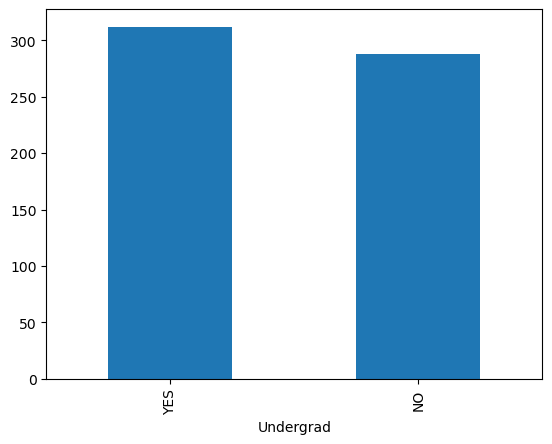

In [18]:
df3['Undergrad'].value_counts().plot.bar()
plt.xlabel('Undergrad')
print(df3['Undergrad'].value_counts())

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


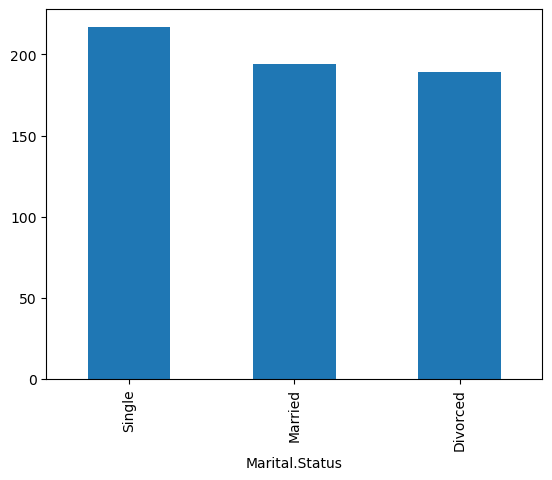

In [19]:
df3['Marital.Status'].value_counts().plot.bar()
plt.xlabel('Marital.Status')
print(df3['Marital.Status'].value_counts())

YES    302
NO     298
Name: Urban, dtype: int64


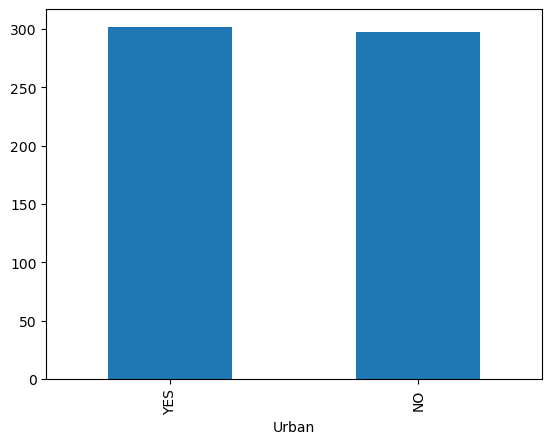

In [20]:
df3['Urban'].value_counts().plot.bar()
plt.xlabel('Urban')
print(df3['Urban'].value_counts())

1    476
0    124
Name: Category, dtype: int64


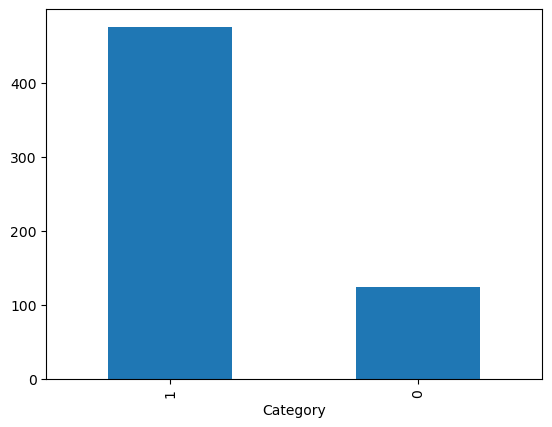

In [21]:
df3['Category'].value_counts().plot.bar()
plt.xlabel('Category')
print(df3['Category'].value_counts())

C:\Users\vishal\AppData\Local\Temp\ipykernel_8100\3152498896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Work.Experience'])


<Axes: xlabel='Work.Experience', ylabel='Density'>

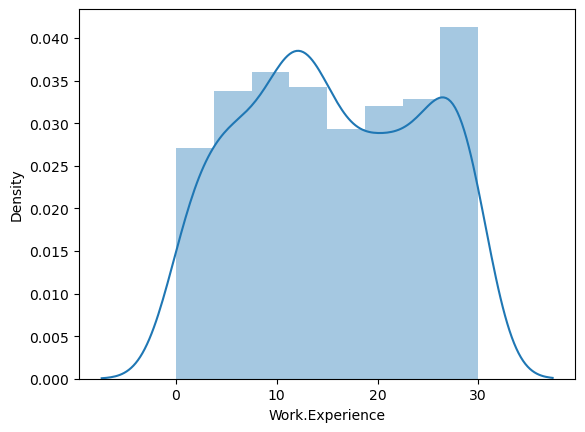

In [22]:
sns.distplot(df3['Work.Experience'])

<Axes: >

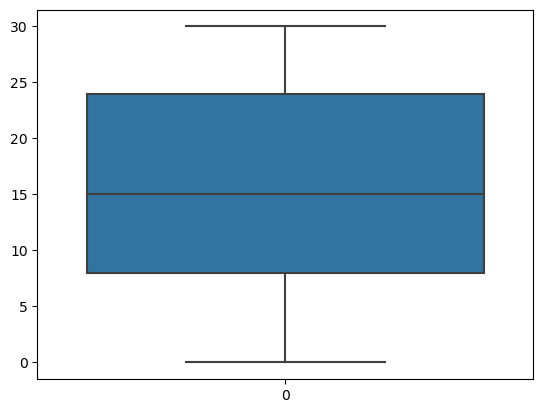

In [23]:
sns.boxplot(df3['Work.Experience'])

<Axes: xlabel='Category', ylabel='Work.Experience'>

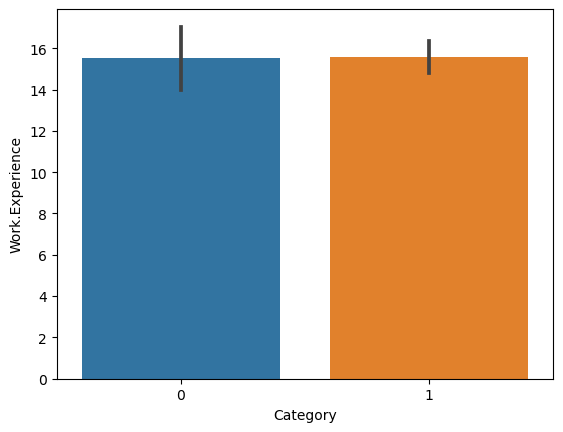

In [24]:
sns.barplot(y= 'Work.Experience',x ='Category', data=df3)

<Axes: xlabel='Urban', ylabel='Work.Experience'>

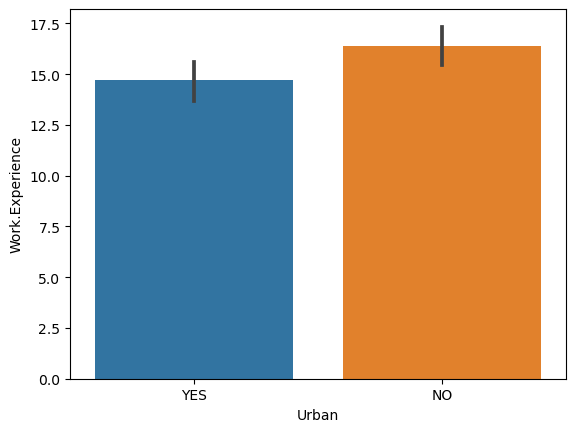

In [25]:
sns.barplot(y= 'Work.Experience',x ='Urban', data=df3)

<Axes: xlabel='Undergrad', ylabel='Work.Experience'>

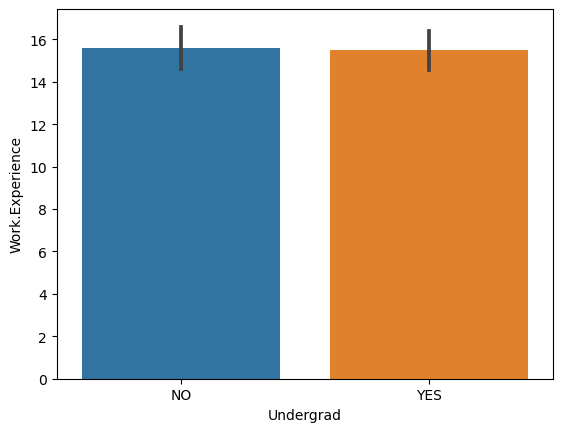

In [26]:
sns.barplot(y= 'Work.Experience',x ='Undergrad', data=df3)

<Axes: xlabel='Marital.Status', ylabel='Work.Experience'>

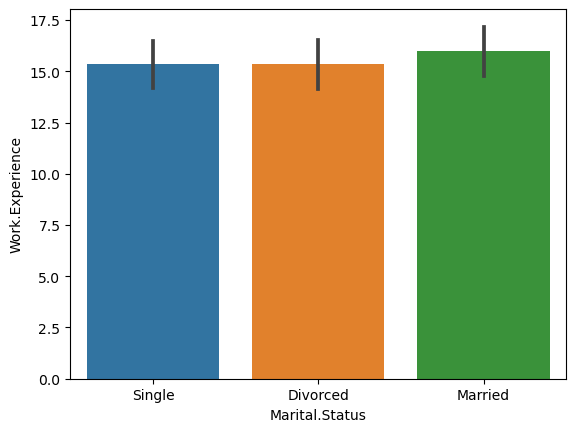

In [27]:
sns.barplot(y= 'Work.Experience',x ='Marital.Status', data=df3)

In [28]:
df3 = pd.get_dummies(df3)

In [29]:
df3.head()

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,19,0,1,0,0,0,1,0,1
1,14,0,1,0,1,0,0,0,1
2,29,0,0,1,1,0,0,1,0
3,30,0,1,0,0,0,1,0,1
4,7,0,0,1,1,0,0,0,1


In [30]:
df3.corr().iloc[1,:]

Work.Experience            0.001972
Category                   1.000000
Undergrad_NO               0.012523
Undergrad_YES             -0.012523
Marital.Status_Divorced    0.027115
Marital.Status_Married    -0.043178
Marital.Status_Single      0.015820
Urban_NO                   0.004830
Urban_YES                 -0.004830
Name: Category, dtype: float64

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


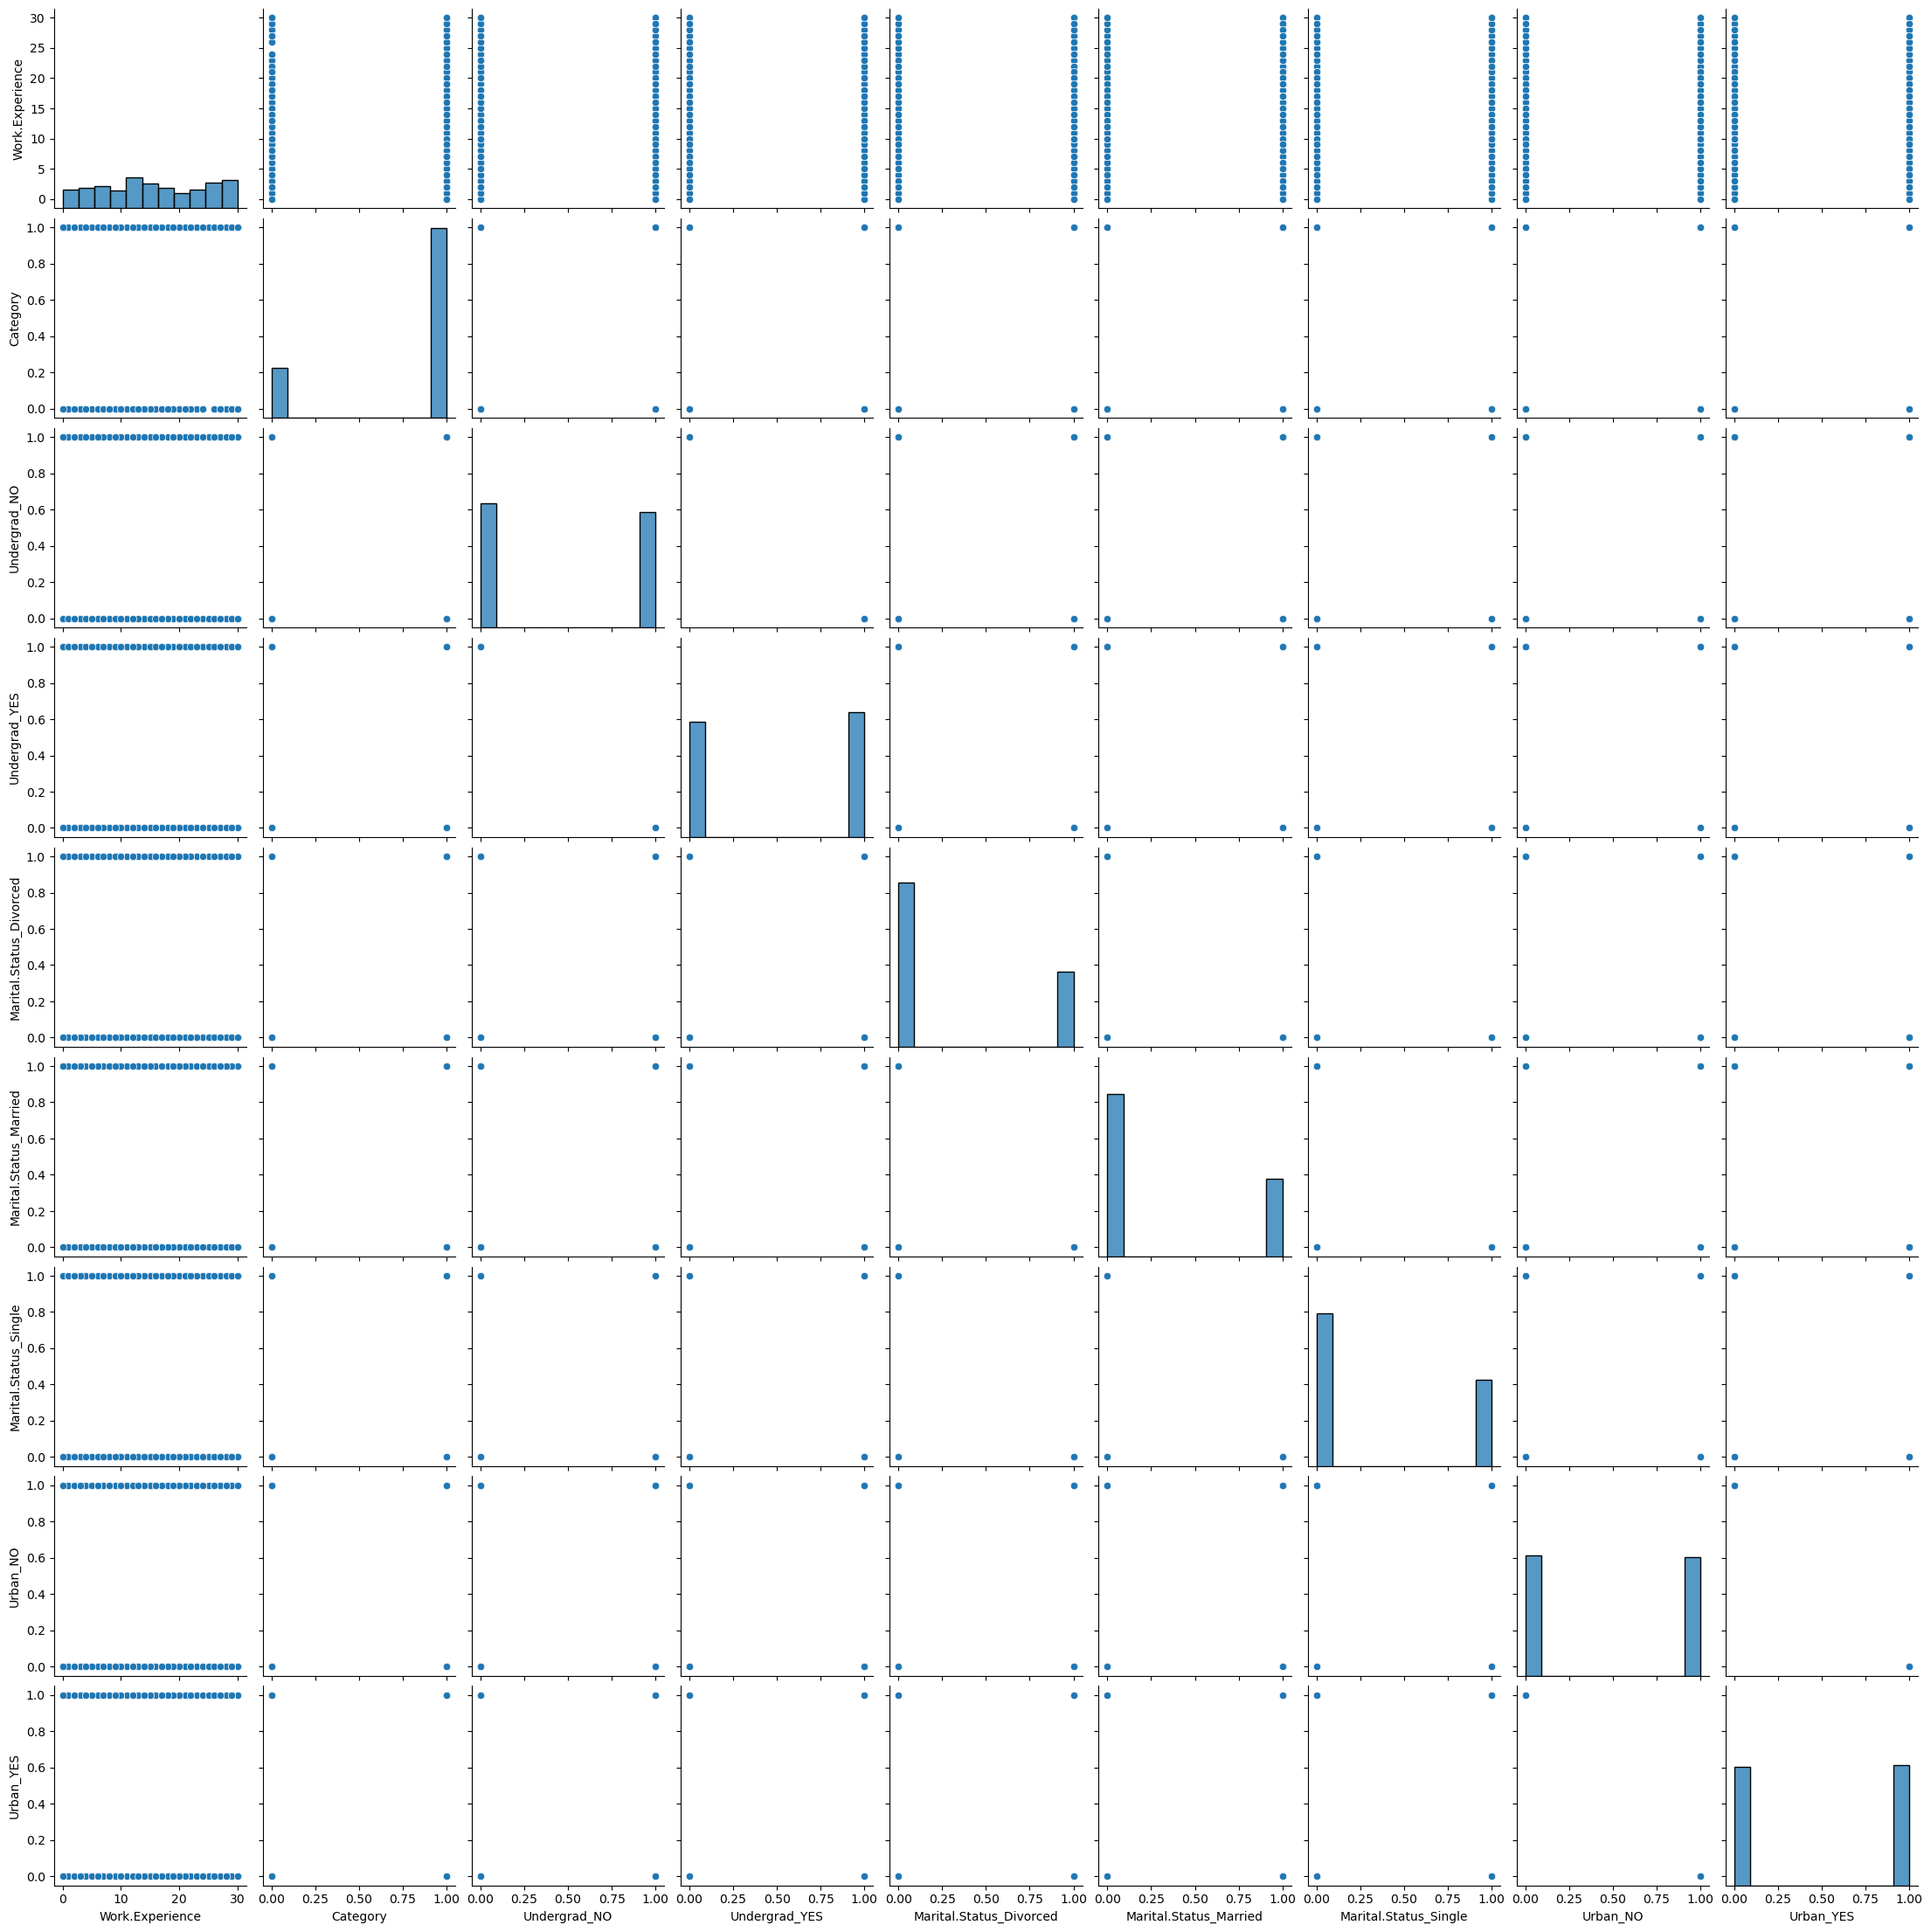

In [31]:
sns.pairplot(df3)

In [32]:
import ppscore as pps

In [33]:
with pd.option_context("display.max_rows", None):
    display(pps.matrix(df3))

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Work.Experience,Work.Experience,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Work.Experience,Category,0.000000,regression,True,mean absolute error,0.206667,0.327970,DecisionTreeRegressor()
2,Work.Experience,Undergrad_NO,0.000000,regression,True,mean absolute error,0.480000,0.498557,DecisionTreeRegressor()
3,Work.Experience,Undergrad_YES,0.000000,regression,True,mean absolute error,0.480000,0.498557,DecisionTreeRegressor()
4,Work.Experience,Marital.Status_Divorced,0.000000,regression,True,mean absolute error,0.315000,0.432021,DecisionTreeRegressor()
5,Work.Experience,Marital.Status_Married,0.000000,regression,True,mean absolute error,0.323333,0.442167,DecisionTreeRegressor()
6,Work.Experience,Marital.Status_Single,0.000000,regression,True,mean absolute error,0.361667,0.467733,DecisionTreeRegressor()
7,Work.Experience,Urban_NO,0.000000,regression,True,mean absolute error,0.496667,0.499499,DecisionTreeRegressor()
8,Work.Experience,Urban_YES,0.000000,regression,True,mean absolute error,0.496667,0.499499,DecisionTreeRegressor()
9,Category,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.652601,DecisionTreeRegressor()


In [34]:
from sklearn.ensemble import IsolationForest
df_f = df3.copy()

In [35]:
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(df_f)

IsolationForest(contamination=0.01, random_state=10)

In [36]:
df_f['anamoly'] = clf.predict(df_f.iloc[:,0:9])
df_f[df_f['anamoly']==-1]

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anamoly
6,1,0,0,1,1,0,0,0,1,-1
40,30,0,1,0,1,0,0,1,0,-1
45,4,0,1,0,1,0,0,0,1,-1
60,1,0,0,1,1,0,0,1,0,-1
66,1,0,1,0,1,0,0,1,0,-1
69,1,0,0,1,0,0,1,0,1,-1


In [37]:
df_final = df3.drop([6,40,45,60,66,69])
df_final.shape

(594, 9)

In [38]:
df_final.head()

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,19,0,1,0,0,0,1,0,1
1,14,0,1,0,1,0,0,0,1
2,29,0,0,1,1,0,0,1,0
3,30,0,1,0,0,0,1,0,1
4,7,0,0,1,1,0,0,0,1


In [39]:
x = df_final.drop('Category', axis=1)
y = df_final['Category']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

In [41]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
print(model.feature_importances_)

[0.71321381 0.06557644 0.04454576 0.0788316  0.0978324  0.
 0.         0.        ]


In [43]:
df_final.columns

Index(['Work.Experience', 'Category', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

[Text(0.35, 0.9, 'x[0] <= 1.5\nentropy = 0.731\nsamples = 415\nvalue = [85, 330]'),
 Text(0.1, 0.7, 'x[4] <= 0.5\nentropy = 0.323\nsamples = 17\nvalue = [1, 16]'),
 Text(0.05, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.15, 0.5, 'x[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1, 0.3, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.7, 'x[1] <= 0.5\nentropy = 0.743\nsamples = 398\nvalue = [84, 314]'),
 Text(0.4, 0.5, 'x[0] <= 13.5\nentropy = 0.791\nsamples = 202\nvalue = [48, 154]'),
 Text(0.3, 0.3, 'x[0] <= 11.5\nentropy = 0.707\nsamples = 83\nvalue = [16, 67]'),
 Text(0.25, 0.1, 'entropy = 0.767\nsamples = 67\nvalue = [15, 52]'),
 Text(0.35, 0.1, 'entropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(0.5, 0.3, 'x[0] <= 24.5\nentro

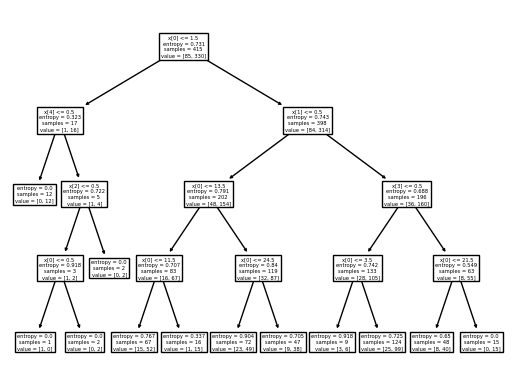

In [44]:
tree.plot_tree(model)

[Text(0.35, 0.9, 'Undergrad_YES <= 1.5\nentropy = 0.731\nsamples = 415\nvalue = [85, 330]\nclass = Good'),
 Text(0.1, 0.7, 'Marital.Status_MarriedWork.Experience <= 0.5\nentropy = 0.323\nsamples = 17\nvalue = [1, 16]\nclass = Good'),
 Text(0.05, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Good'),
 Text(0.15, 0.5, 'Marital.Status_Divorced <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Good'),
 Text(0.1, 0.3, 'Undergrad_YES <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Good'),
 Text(0.05, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Risky'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(0.6, 0.7, 'Undergrad_No <= 0.5\nentropy = 0.743\nsamples = 398\nvalue = [84, 314]\nclass = Good'),
 Text(0.4, 0.5, 'Undergrad_YES <= 13.5\nentropy = 0.791\nsamples = 202\nvalue = [48, 154]\nclass = Good'),
 Text(0.3, 0.3, 'Undergrad_

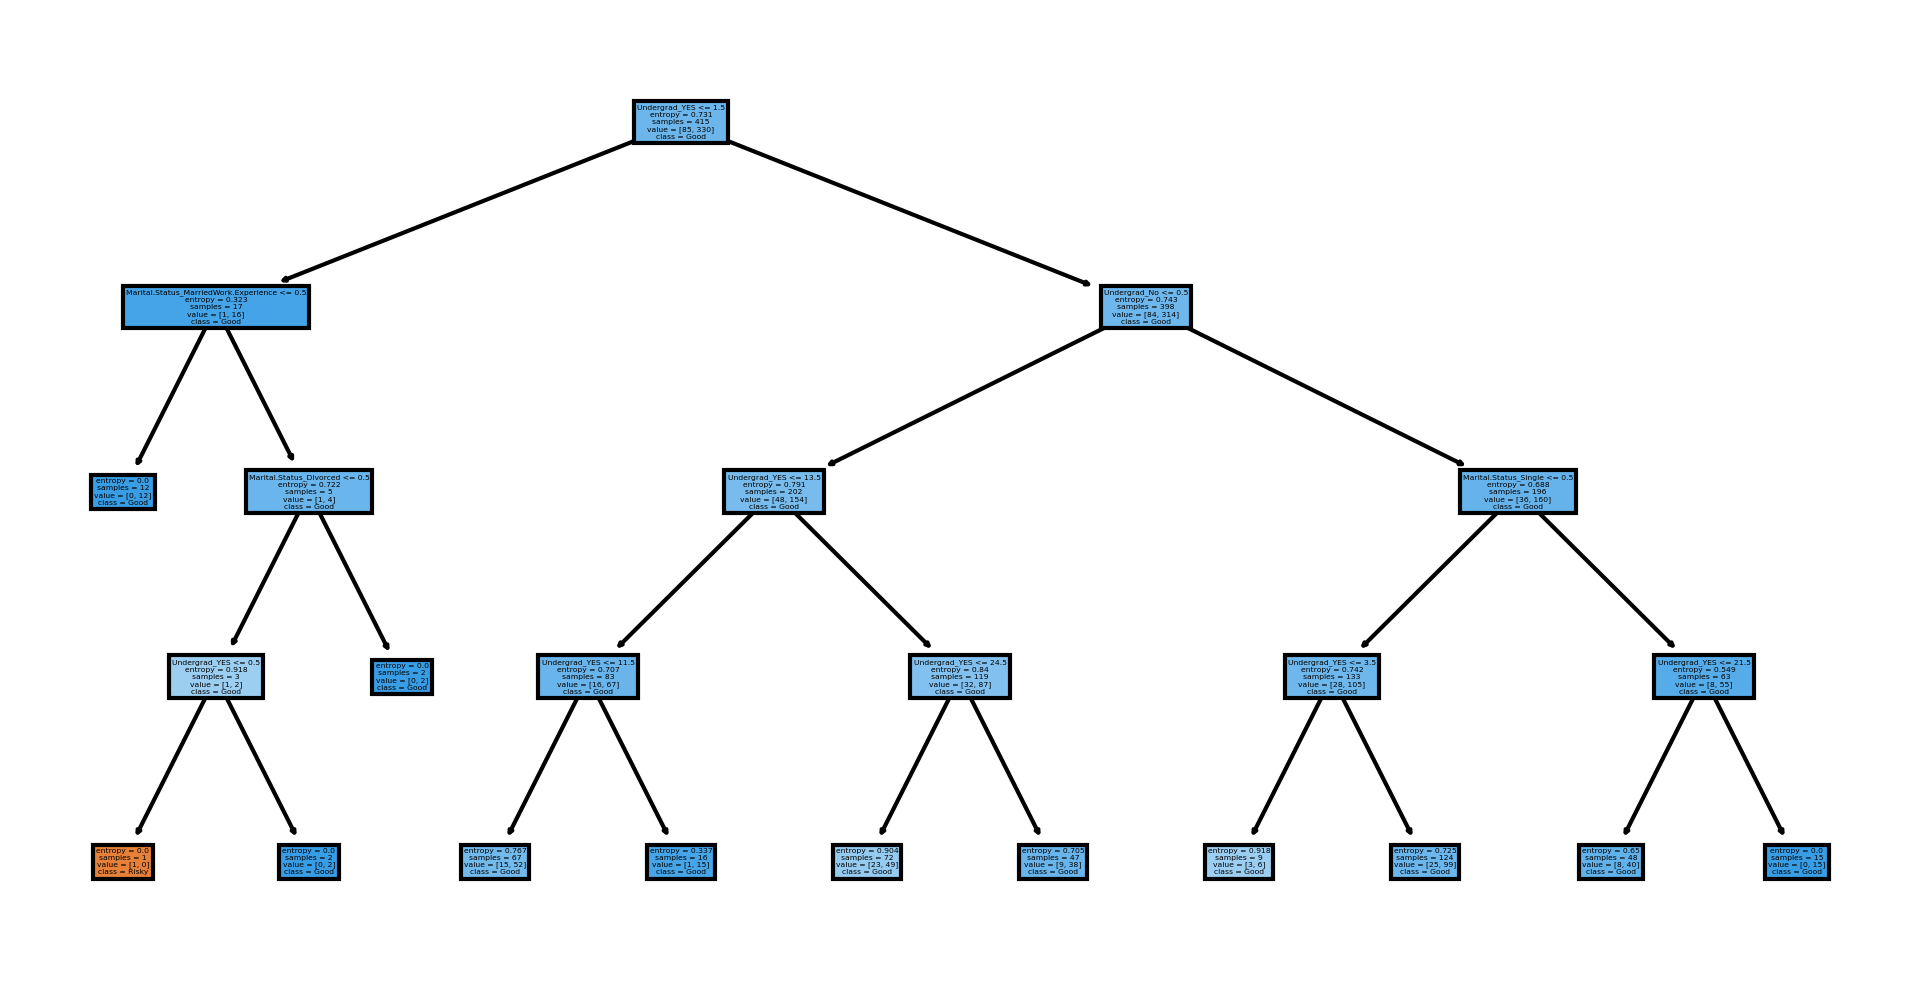

In [45]:
fn=['Undergrad_YES', 'Undergrad_No','Marital.Status_Divorced','Marital.Status_Single', 'Marital.Status_Married' 'Work.Experience', 'Urban_YES', 'Urban_NO']
cn=['Risky', 'Good']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True)

In [46]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    178
0      1
dtype: int64

In [47]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [48]:
pd.crosstab(y_test, pred)

col_0,0,1
Category,,
0,0,33
1,1,145


In [49]:
np.mean(pred==y_test)

0.8100558659217877

# Decision Tree using CART

In [50]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=4)

In [51]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [52]:
pred_gini = model_gini.predict(x_test)

In [53]:
pd.crosstab(y_test, pred_gini)

col_0,0,1
Category,,
0,0,33
1,1,145


In [54]:
np.mean(pred_gini==y_test)

0.8100558659217877

In [55]:
pred_gini = pd.DataFrame(pred_gini)
pred_gini.columns = ['Category_pred']

In [56]:
x_test1 = x_test.reset_index()
x_test1

,index,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,432,20,1,0,0,1,0,1,0
1,17,23,0,1,0,0,1,1,0
2,174,15,0,1,0,0,1,1,0
3,44,20,1,0,1,0,0,1,0
4,469,5,1,0,0,1,0,0,1
5,54,9,1,0,0,1,0,0,1
6,219,11,0,1,1,0,0,1,0
7,427,5,0,1,0,0,1,1,0
8,297,17,0,1,0,0,1,0,1
9,46,10,1,0,1,0,0,1,0


In [57]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Category_test']
y_test1 = y_test.reset_index().drop('index', axis=1)

In [58]:
with pd.option_context("display.max_rows", None):
    display(pd.concat([x_test1, y_test1, pred_gini], axis=1))

,index,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category_test,Category_pred
0,432,20,1,0,0,1,0,1,0,1,1
1,17,23,0,1,0,0,1,1,0,0,1
2,174,15,0,1,0,0,1,1,0,1,1
3,44,20,1,0,1,0,0,1,0,0,1
4,469,5,1,0,0,1,0,0,1,1,1
5,54,9,1,0,0,1,0,0,1,0,1
6,219,11,0,1,1,0,0,1,0,1,1
7,427,5,0,1,0,0,1,1,0,1,1
8,297,17,0,1,0,0,1,0,1,1,1
9,46,10,1,0,1,0,0,1,0,0,1


# End Assignment